In [3]:
import tejapi
import pandas as pd

tejapi.ApiConfig.api_key  = "your key"
tejapi.ApiConfig.api_base = "https://api.tej.com.tw"
tejapi.ApiConfig.ignoretz = True

In [4]:
coid_list = ['6579', '2353', '6166', '2395', '3711', '3515', '2357', '2417', '3088', '8210', '2324', '5371', '2308', '3048', '5484', '2317', '9921', '2376', '3312', '2356', '6117', '6125', '2449', '6245', '2465', '2301', '2454', '3706', '2377', '6922', '8234', '6569', '4938', '2382', '2359', '3030', '3540', '2330', '2303', '3037', '3231', '6669', '5474'] 


In [5]:
tablebefore = tejapi.get (
    'TWN/APRCD2',
    coid = coid_list ,
    mdate = {'gte':'2024-05-02','lte':'2024-06-02'}, 
    chinese_column_name = True,
    paginate = True, 
    opts={'columns':['coid','mdate','roia']},
    )
tableafter = tejapi.get (
    'TWN/APRCD2',
    coid = coid_list ,
    mdate = {'gte':'2024-06-02','lte':'2024-07-02'}, 
    chinese_column_name = True,
    paginate = True, 
    opts={'columns':['coid','mdate','roia']},
    )


In [6]:

dfbefore = pd.DataFrame(tablebefore)

dfafter = pd.DataFrame(tableafter)


dfbefore



,證券代碼,年月日,日報酬率 %
None,,,
0,2301,2024-05-02,-0.9000
1,2301,2024-05-03,0.6054
2,2301,2024-05-06,-0.3009
3,2301,2024-05-07,-0.3018
4,2301,2024-05-08,2.4218
...,...,...,...
941,9921,2024-05-27,0.0000
942,9921,2024-05-28,1.5982
943,9921,2024-05-29,0.6742


In [7]:
average_return_rate_before = dfbefore.groupby('證券代碼')['日報酬率 %'].mean()

average_return_rate_after= dfafter.groupby('證券代碼')['日報酬率 %'].mean()


In [8]:
std_return_rate_before = dfbefore.groupby('證券代碼')['日報酬率 %'].std()


std_return_rate_after = dfafter.groupby('證券代碼')['日報酬率 %'].std()

In [9]:
sharpe_ratio_before = average_return_rate_before / std_return_rate_before *100  #在此忽略無風險利率

dfbefore = pd.DataFrame(sharpe_ratio_before).reset_index()
dfbefore.rename(columns={'日報酬率 %': '演講前夏普值 %'}, inplace=True)


sharpe_ratio_after = average_return_rate_after / std_return_rate_after *100
dfafter = pd.DataFrame(sharpe_ratio_after).reset_index()
dfafter.rename(columns={'日報酬率 %': '演講後夏普值 %'}, inplace=True)


In [36]:
merged_df = pd.merge(dfbefore, dfafter, on='證券代碼')
merged_df['夏普值差異 '] = merged_df['演講後夏普值 %']-merged_df['演講前夏普值 %']
# 顯示結果

merged_df

,證券代碼,演講前夏普值 %,演講後夏普值 %,夏普值差異
0,2301,12.312575,6.798626,-5.513949
1,2303,27.862752,5.378234,-22.484518
2,2308,3.825403,45.939685,42.114282
3,2317,19.818377,39.003323,19.184947
4,2324,6.891955,-49.955756,-56.847711
5,2330,13.414805,41.007175,27.592370
6,2353,23.543538,-30.757161,-54.300699
7,2356,2.572368,13.339620,10.767252
8,2357,25.830189,-17.348829,-43.179018
9,2359,49.813958,-1.975209,-51.789166


In [47]:
merged_df['是否上升'] = merged_df['夏普值差異 '].apply(lambda x: 'True' if x > 0 else 'False')

merged_df

,證券代碼,演講前夏普值 %,演講後夏普值 %,夏普值差異,是否上升
0,2301,12.312575,6.798626,-5.513949,False
1,2303,27.862752,5.378234,-22.484518,False
2,2308,3.825403,45.939685,42.114282,True
3,2317,19.818377,39.003323,19.184947,True
4,2324,6.891955,-49.955756,-56.847711,False
5,2330,13.414805,41.007175,27.592370,True
6,2353,23.543538,-30.757161,-54.300699,False
7,2356,2.572368,13.339620,10.767252,True
8,2357,25.830189,-17.348829,-43.179018,False
9,2359,49.813958,-1.975209,-51.789166,False


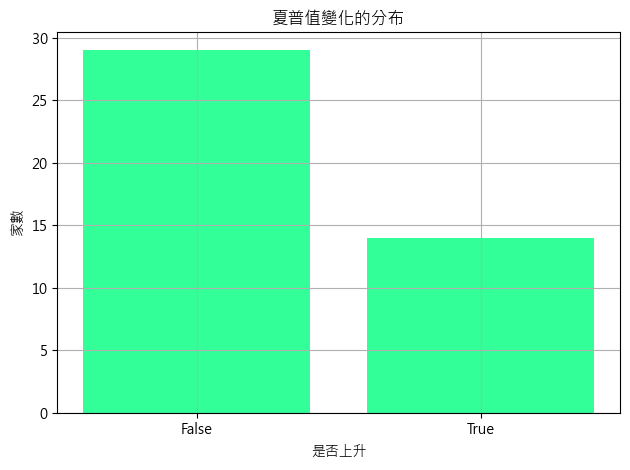

In [55]:
import matplotlib.pyplot as plt
sign_counts = merged_df['是否上升'].value_counts()

# 繪製長條圖
fig, ax = plt.subplots()
ax.bar(sign_counts.index, sign_counts.values, color='#00FF7F',alpha=0.8)

# 設定標籤和標題
ax.set_xlabel('是否上升')
ax.set_ylabel('家數')
ax.set_title('夏普值變化的分布')
plt.grid(True)
plt.tight_layout()

# 顯示圖表
plt.show()

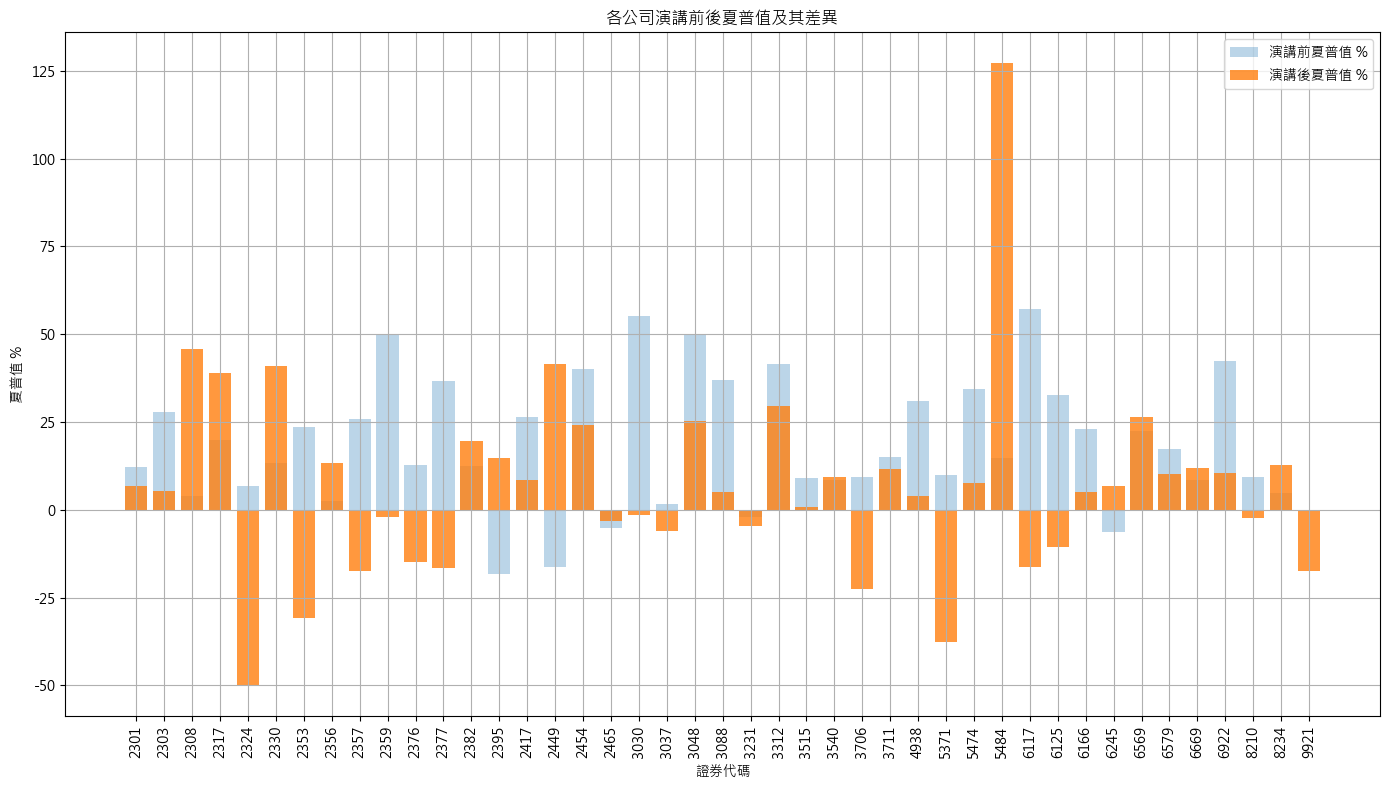

In [34]:


plt.figure(figsize=(14, 8))
plt.bar(merged_df['證券代碼'].astype(str), merged_df['演講前夏普值 %'], label='演講前夏普值 %', alpha=0.3)
plt.bar(merged_df['證券代碼'].astype(str), merged_df['演講後夏普值 %'], label='演講後夏普值 %', alpha=0.8)


# 添加標題和標籤
plt.title('各公司演講前後夏普值及其差異')
plt.xlabel('證券代碼')
plt.ylabel('夏普值 %')
plt.legend()

# 顯示圖表
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()